# Exploratory data analysis

## 1. Dataset description




## 2. Load the dataset

In [1]:
library(testthat)
library(MASS)
library(plotly)
library(htmlwidgets)
library(mice)
library(tidyverse)
library(plotly)
library(htmlwidgets)

Warning message:
"package 'testthat' was built under R version 3.6.2"
Loading required package: ggplot2


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:MASS':

    select


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout


Warning message:
"package 'mice' was built under R version 3.6.2"
Loading required package: lattice


Attaching package: 'mice'


The following objects are masked from 'package:base':

    cbind, rbind


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
v purrr   0.3.3     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::complete() masks mice::complete()
x dplyr::filter()   masks plotly::filter(), stats

In [2]:
url <- "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series"
covid19_confirmed <- read_csv(paste(url, "/time_series_covid19_confirmed_global.csv?raw=true", sep = ""))
covid19_death <- read_csv(paste(url, "/time_series_covid19_deaths_global.csv?raw=true", sep = ""))

Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)

See spec(...) for full column specifications.



In [3]:
gov_resp <- read_csv("https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv")

Warning message:
"Missing column names filled in: 'X27' [27]"
Parsed with column specification:
cols(
  .default = col_double(),
  CountryName = col_character(),
  CountryCode = col_character(),
  X27 = col_logical()
)

See spec(...) for full column specifications.



In [4]:
head(covid19_confirmed)

Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,933,996,1026,1092,1176,1279,1351,1463,1531,1703
NA,Albania,41.1533,20.1683,0,0,0,0,0,0,...,548,562,584,609,634,663,678,712,726,736
NA,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517
NA,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,704,713,717,717,723,723,731,738,738,743
NA,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,24,24,25,25,25,25,26,27
NA,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,23,23,23,24,24,24,24,24,24


In [ ]:

#'
#'
get_data <- function(label, skip = 4){
    read_csv(paste("../data/raw_data/", label, sep = ""), skip = skip)
}

with open('../data/clean_data/filenames.json', 'r') as json_data:
    filenames = json.load(json_data)

age_65up <- get_data(filenames['age_65up'])
age_1564 <- get_data(filenames['age_1564'])
air_pollution <- get_data(filenames['air_pollution'])
medical_bed <- get_data(filenames['medical_bed'])
physicians <- get_data(filenames['physicians'])
nurses_midwives <- get_data(filenames['nurses_midwives'])
population_density <- get_data(filenames['population_density'])
population_total <- get_data(filenames['population_total'])
smoking <- get_data(filenames['smoking'])

In [ ]:
head(age_65up)
head(age_1564)
head(air_pollution)
head(medical_bed)
head(physicians)
head(nurses_midwives)
head(population_density)
head(population_total)
head(smoking)

In [7]:
head(gov_resp)

CountryName,CountryCode,Date,S1_School closing,S1_IsGeneral,S2_Workplace closing,S2_IsGeneral,S3_Cancel public events,S3_IsGeneral,S4_Close public transport,...,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,S12_Testing framework,S13_Contact tracing,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,X27
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Aruba,ABW,20200101,0,NA,0,NA,0,NA,0,...,0,0,0,0,0,NA,NA,0,0,NA
Aruba,ABW,20200102,0,NA,0,NA,0,NA,0,...,0,0,0,0,0,NA,NA,0,0,NA
Aruba,ABW,20200103,0,NA,0,NA,0,NA,0,...,0,0,0,0,0,NA,NA,0,0,NA
Aruba,ABW,20200104,0,NA,0,NA,0,NA,0,...,0,0,0,0,0,NA,NA,0,0,NA
Aruba,ABW,20200105,0,NA,0,NA,0,NA,0,...,0,0,0,0,0,NA,NA,0,0,NA
Aruba,ABW,20200106,0,NA,0,NA,0,NA,0,...,0,0,0,0,0,NA,NA,0,0,NA


## 3. Explore the dataset

In [8]:
dim(covid19_confirmed)

[1] 264 101

In [9]:
colnames(covid19_confirmed)[length(covid19_confirmed)]

[1] "4/27/20"

In [10]:
dim(covid19_death)

[1] 264 101

In [11]:
colnames(covid19_death)[length(covid19_death)]

[1] "4/27/20"

In [12]:
length(unique(gov_resp$CountryName))

[1] 151

In [13]:
test_that("Column names of covid19_confirmed and covid19_death should be the same.",
          {expect_true(all(colnames(covid19_confirmed) == colnames(covid19_death)))
          })

In [14]:
test_that("The country column of covid19_confirmed and covid19_death should be the same.",
          {expect_true(all(covid19_confirmed[2] == covid19_death[2]))
          })

In [15]:
test_that("The last column of covid19_confirmed should not have missing values.",
          {expect_true(all(!is.na(covid19_confirmed[length(covid19_confirmed)])))
          })

In [16]:
test_that("The last column of covid19_death should not have missing values.",
          {expect_true(all(!is.na(covid19_death[length(covid19_death)])))
          })

## 4. Initial thoughts


## 5. Wrangling

In [17]:
#'
#'
clean_data <- function(df, name){
    colnames(df)[1] <- 'country' 
    ret <- df[c(-2, -3, -4)] %>%
        gather(year, {{name}}, -country) %>%
        drop_na() %>%
        group_by(country) %>%
        top_n(1, year) %>%
        ungroup() %>%
        mutate(country = case_when(country == 'Bahamas, The' ~ 'Bahamas',
                                   country == 'Brunei Darussalam' ~ 'Brunei',
                                   country == 'Egypt, Arab Rep.' ~ 'Egypt',
                                   country == 'Gambia, The' ~ 'Gambia',
                                   country == 'Iran, Islamic Rep.' ~ 'Iran',
                                   country == 'Korea, Dem. People’s Rep.' ~ 'South Korea',
                                   country == 'Czech Republic' ~ 'Czechia',
                                   country == 'Lao PDR' ~ 'Laos',
                                   country == 'Russian Federation' ~ 'Russia',
                                   country == 'St. Lucia' ~ 'Saint Lucia',
                                   country == 'St. Vincent and the Grenadines' ~ 'Saint Vincent and the Grenadines',
                                   country == 'Slovak Republic' ~ 'Slovakia',
                                   country == 'Syrian Arab Republic' ~ 'Syria',
                                   country == 'Venezuela, RB' ~ 'Venezuela',
                                   country == 'Sub-Saharan Africa' ~ 'Western Sahara',
                                   country == 'Yemen, Rep.' ~ 'Yemen',
                                   TRUE ~ country))
    colnames(ret)[2] <- paste("year_", name, sep="")
    ret
}

In [18]:
age_65up <- clean_data(age_65up, "age_65up")
age_1564 <- clean_data(age_1564, "age_1564")
air_pollution <- clean_data(air_pollution, "air_pollution")
medical_bed <- clean_data(medical_bed, "med_bed")
physicians <- clean_data(physicians, "physicians")
nurses_midwives <- clean_data(nurses_midwives, "nurses_midwives")
population_density <- clean_data(population_density, "pop_density")
population_total <- clean_data(population_total, "pop_total")
smoking <- clean_data(smoking, "smoking")

In [19]:
write_csv(age_65up, "../data/clean_data/age_65up_clean.csv")
write_csv(age_1564, "../data/clean_data/age_1564_clean.csv")
write_csv(air_pollution, "../data/clean_data/air_pollution_clean.csv")
write_csv(medical_bed, "../data/clean_data/medical_bed_clean.csv")
write_csv(physicians, "../data/clean_data/physicians_clean.csv")
write_csv(nurses_midwives, "../data/clean_data/nurses_midwives.csv")
write_csv(population_density, "../data/clean_data/population_density_clean.csv")
write_csv(population_total, "../data/clean_data/population_total_clean.csv")
write_csv(smoking, "../data/clean_data/smoking_clean.csv")

In [ ]:
age_65up <- read_csv("../data/clean_data/age_65up_clean.csv")
age_1564 <- read_csv("../data/clean_data/age_1564_clean.csv")
air_pollution <- read_csv("../data/clean_data/air_pollution_clean.csv")
medical_bed <- read_csv("../data/clean_data/medical_bed_clean.csv")
physicians <- read_csv("../data/clean_data/physicians_clean.csv")
nurses_midwives <- read_csv("../data/clean_data/nurses_midwives.csv")
population_density <- read_csv("../data/clean_data/population_density_clean.csv")
population_total <- read_csv("../data/clean_data/population_total_clean.csv")
smoking <- read_csv("../data/clean_data/smoking_clean.csv")

In [21]:
dim(age_65up)
dim(age_1564)
dim(air_pollution)
dim(medical_bed)
dim(physicians)
dim(nurses_midwives)
dim(population_density)
dim(population_total)
dim(smoking)

[1] 240   3

[1] 240   3

[1] 240   3

[1] 246   3

[1] 253   3

[1] 238   3

[1] 261   3

[1] 263   3

[1] 187   3

In [22]:
df_list <- list(population_total, age_65up, age_1564, air_pollution, medical_bed, 
                physicians, nurses_midwives, population_density, smoking)
country_data <- Reduce(function(left, right) merge(left, right, all = TRUE), df_list)

In [23]:
head(country_data)

country,year_pop_total,pop_total,year_age_65up,age_65up,year_age_1564,age_1564,year_air_pollution,air_pollution,year_med_bed,med_bed,year_physicians,physicians,year_nurses_midwives,nurses_midwives,year_pop_density,pop_density,year_smoking,smoking
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2018,37172386,2018,2.584927,2018,54.32490,2017,56.91081,2015,0.5,2016,0.2840,2014,0.3200,2018,56.93776,NA,NA
Albania,2018,2866376,2018,13.744736,2018,68.58239,2017,18.20060,2013,2.9,2016,1.1998,2016,3.5998,2018,104.61226,2016,28.7
Algeria,2018,42228429,2018,6.362497,2018,63.48882,2017,38.88401,2015,1.9,2016,1.8300,2016,2.2400,2018,17.73008,2016,15.6
American Samoa,2018,55465,NA,NA,NA,NA,2017,12.47382,NA,NA,1999,0.7810,NA,NA,2018,277.32500,NA,NA
Andorra,2018,77006,NA,NA,NA,NA,2017,10.30762,2009,2.5,2015,3.3333,2015,4.0128,2018,163.84255,2016,33.5
Angola,2018,30809762,2018,2.216374,2018,50.97470,2017,32.38850,2005,0.8,2017,0.2149,2009,1.3123,2018,24.71305,NA,NA


In [24]:
dim(country_data)

[1] 263  19

In [25]:
confirmed <- covid19_confirmed[c(2, length(covid19_confirmed))]
colnames(confirmed) = c("country", "n")

confirmed <- confirmed %>%
    group_by(country) %>%
    summarize(confirmed = sum(n))

In [26]:
death <- covid19_death[c(2, length(covid19_death))]
colnames(death) = c("country", "n")

death <- death %>%
    group_by(country) %>%
    summarize(death = sum(n))

In [27]:
covid19 <- merge(confirmed, death, by = "country") %>%
    mutate(rate = death / confirmed)
head(covid19)

country,confirmed,death,rate
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1703,57,0.03347035
Albania,736,28,0.03804348
Algeria,3517,432,0.12283196
Andorra,743,40,0.05383580
Angola,27,2,0.07407407
Antigua and Barbuda,24,3,0.12500000


In [28]:
dim(covid19)

[1] 185   4

In [29]:
covid19 %>%
    filter(rate >= 1)

country,confirmed,death,rate
<chr>,<dbl>,<dbl>,<dbl>


In [30]:
covid19 %>%
    filter(!country %in% country_data$country)

country,confirmed,death,rate
<chr>,<dbl>,<dbl>,<dbl>
Burma,146,5,0.03424658
Congo (Brazzaville),200,6,0.03000000
Congo (Kinshasa),459,28,0.06100218
Diamond Princess,712,13,0.01825843
Holy See,9,0,0.00000000
"Korea, South",10752,244,0.02269345
Kyrgyzstan,695,8,0.01151079
MS Zaandam,9,2,0.22222222
Saint Kitts and Nevis,15,0,0.00000000


In [31]:
date_df <- gov_resp %>%
    group_by(CountryName) %>%
    summarize(Date = max(Date))

In [32]:
gov_resp <- merge(gov_resp, date_df, by=c("CountryName", "Date")) %>%
    select(CountryName, StringencyIndexForDisplay)
colnames(gov_resp) <- c("country", "gov_resp")

In [33]:
gov_resp %>%
    filter(!country %in% covid19$country)

country,gov_resp
<chr>,<dbl>
Aruba,85.71
Bermuda,85.71
Cape Verde,NA
Czech Republic,80.95
Democratic Republic of Congo,85.71
Greenland,71.43
Guam,76.19
Hong Kong,85.71
Kyrgyz Republic,90.48


In [34]:
gov_resp <- gov_resp %>%
    mutate(country = case_when(country == 'Cape Verde' ~ 'Cabo Verde',
                               country == 'Czech Republic' ~ 'Czechia',
                               country == 'Democratic Republic of Congo' ~ 'Congo, Dem. Rep.',
                               country == 'Slovak Republic' ~ 'Slovakia',
                               TRUE ~ country))

In [35]:
covid19 <- covid19 %>%
    mutate(country = case_when(country == 'Burma' ~ 'Myanmar',
                               country == 'Congo (Brazzaville)' ~ 'Congo, Rep.',
                               country == 'Congo (Kinshasa)' ~ 'Congo, Dem. Rep.',
                               country == 'Korea, South' ~ 'South Korea',
                               country == 'Kyrgyzstan' ~ 'Kyrgyz Republic',
                               country == 'US' ~ 'United States',
                               TRUE ~ country))

In [36]:
covid19 %>%
    filter(!country %in% country_data$country)

country,confirmed,death,rate
<chr>,<dbl>,<dbl>,<dbl>
Diamond Princess,712,13,0.01825843
Holy See,9,0,0.00000000
MS Zaandam,9,2,0.22222222
Saint Kitts and Nevis,15,0,0.00000000
Taiwan*,429,6,0.01398601


In [37]:
gov_resp %>%
    filter(!country %in% covid19$country)

country,gov_resp
<chr>,<dbl>
Aruba,85.71
Bermuda,85.71
Greenland,71.43
Guam,76.19
Hong Kong,85.71
Lesotho,100.00
Macao,66.67
Palestine,54.76
Puerto Rico,80.95


In [38]:
data <- merge(country_data, covid19, by = "country")

In [39]:
data$confirmed_rate <- data$confirmed / data$pop_total

In [40]:
dim(data)

[1] 180  23

In [41]:
data_gov <- merge(data, gov_resp, by = "country")

In [42]:
dim(data_gov)

[1] 141  24

In [43]:
head(data_gov)

country,year_pop_total,pop_total,year_age_65up,age_65up,year_age_1564,age_1564,year_air_pollution,air_pollution,year_med_bed,...,nurses_midwives,year_pop_density,pop_density,year_smoking,smoking,confirmed,death,rate,confirmed_rate,gov_resp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2018,37172386,2018,2.584927,2018,54.32490,2017,56.91081,2015,...,0.3200,2018,56.93776,NA,NA,1703,57,0.03347035,4.581358e-05,71.43
Albania,2018,2866376,2018,13.744736,2018,68.58239,2017,18.20060,2013,...,3.5998,2018,104.61226,2016,28.7,736,28,0.03804348,2.567702e-04,85.71
Algeria,2018,42228429,2018,6.362497,2018,63.48882,2017,38.88401,2015,...,2.2400,2018,17.73008,2016,15.6,3517,432,0.12283196,8.328513e-05,95.24
Andorra,2018,77006,NA,NA,NA,NA,2017,10.30762,2009,...,4.0128,2018,163.84255,2016,33.5,743,40,0.05383580,9.648599e-03,71.43
Angola,2018,30809762,2018,2.216374,2018,50.97470,2017,32.38850,2005,...,1.3123,2018,24.71305,NA,NA,27,2,0.07407407,8.763456e-07,71.43
Argentina,2018,44494502,2018,11.117789,2018,64.12128,2017,13.31183,2014,...,2.5800,2018,16.25851,2016,21.8,4003,197,0.04921309,8.996617e-05,95.24


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



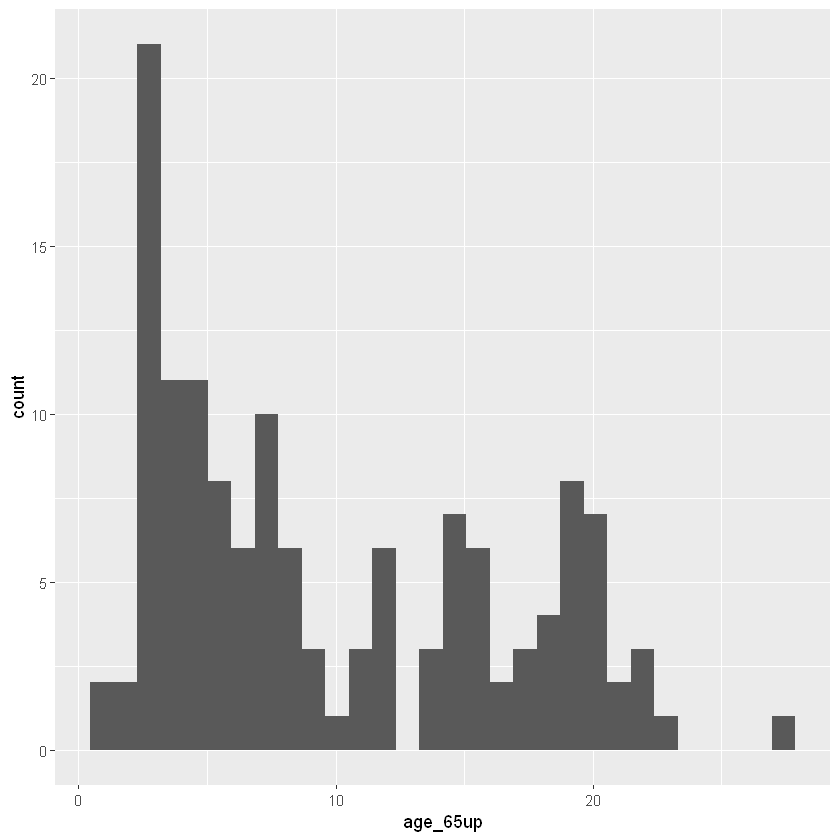

In [46]:
drop_na(data) %>%
    ggplot(aes(age_65up)) +
    geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



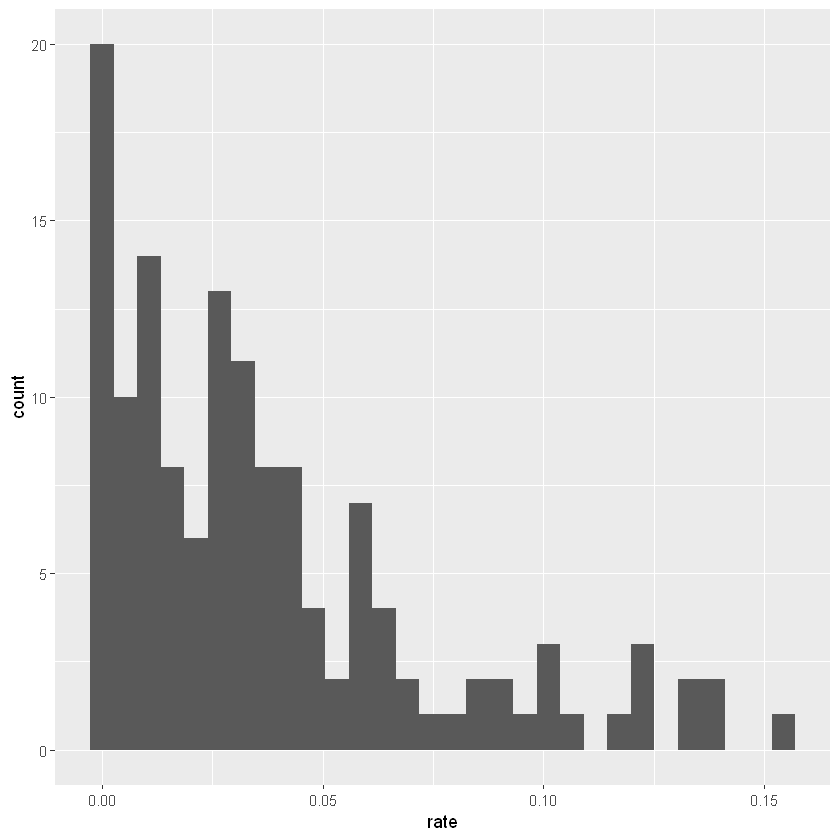

In [47]:
drop_na(data) %>%
    ggplot(aes(rate)) +
    geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



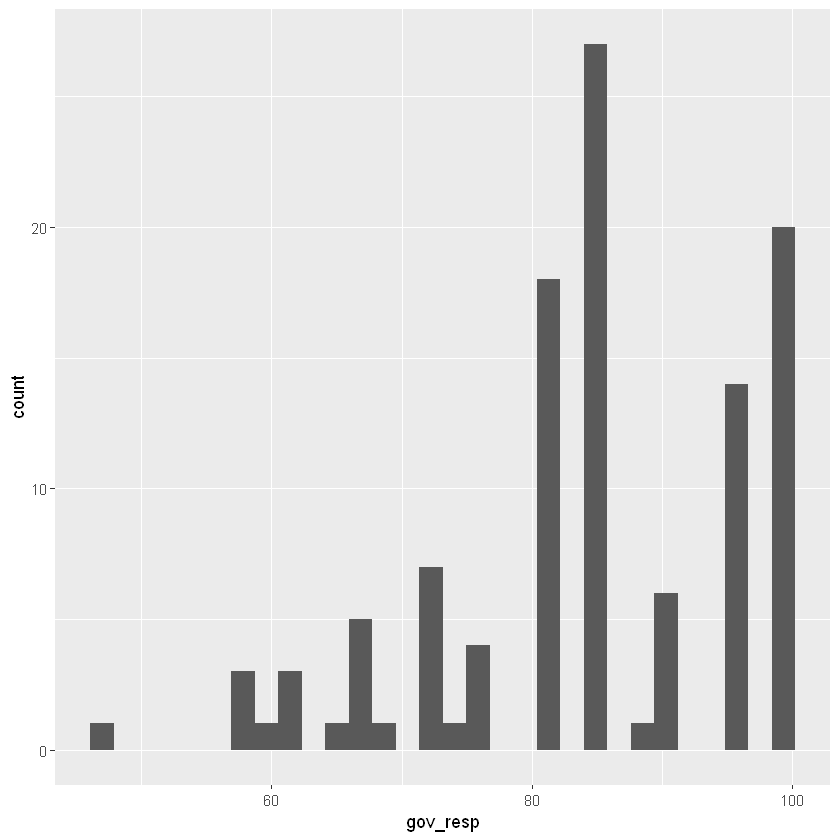

In [48]:
drop_na(data_gov) %>%
    ggplot(aes(gov_resp)) +
    geom_histogram()

In [53]:
p1 <- drop_na(data) %>%
    ggplot(aes(age_65up, 
               rate, 
               text = paste(
                   'country', country,
                   '\nage_65up', age_65up,
                   '\nrate', rate
               ))) +
    geom_point()

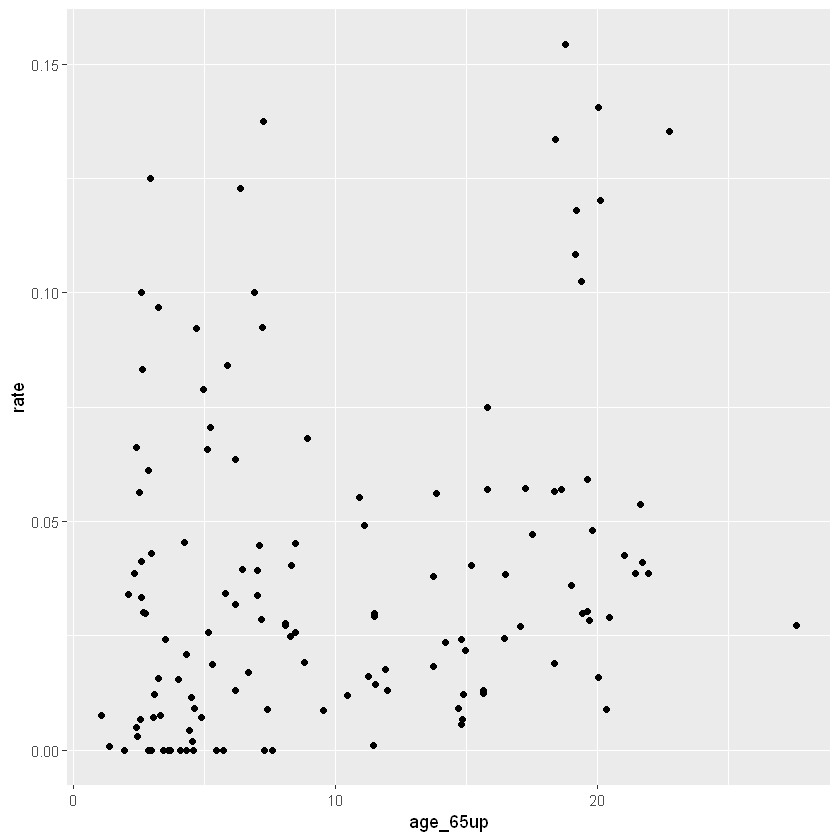

In [55]:
p1

In [ ]:
ggplotly(p1, tooltip = "text")

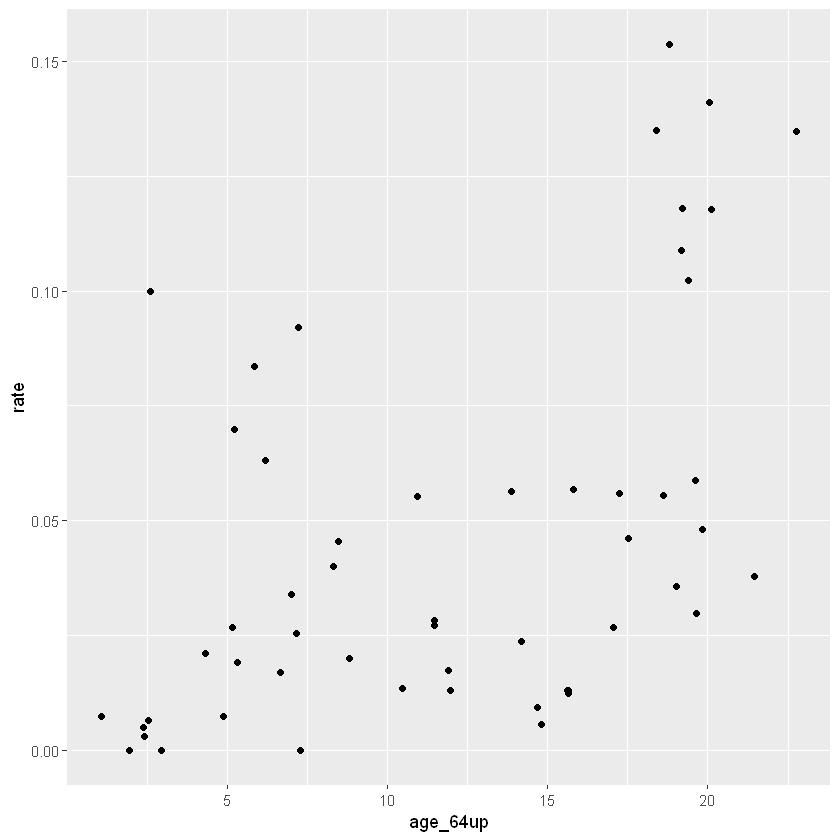

In [41]:
drop_na(data_gov) %>%
    ggplot(aes(age_64up, rate)) +
    geom_point()

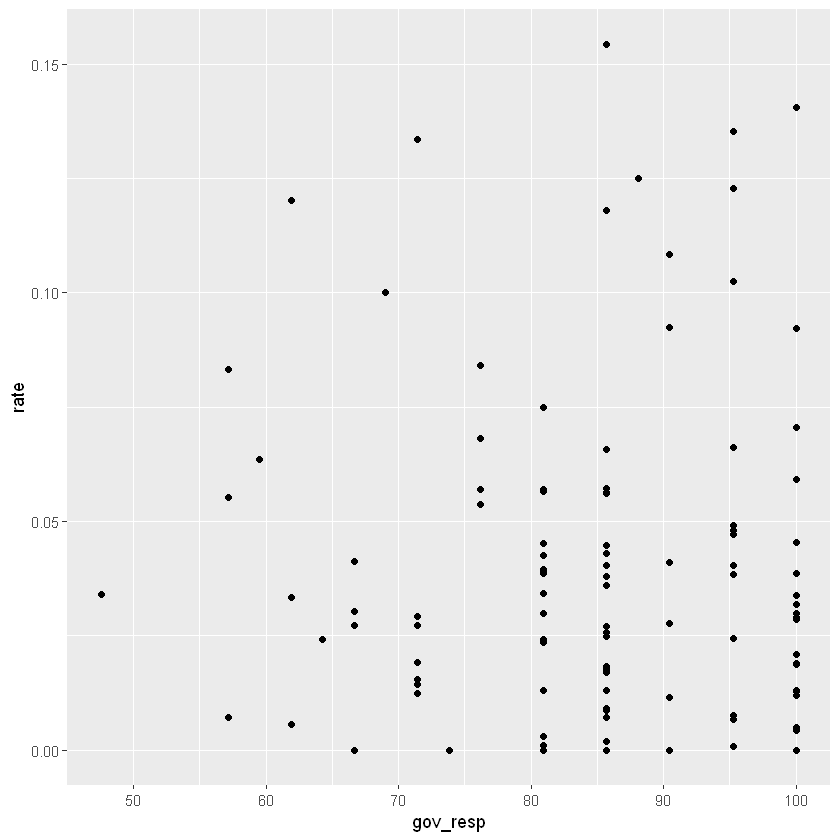

In [56]:
drop_na(data_gov) %>%
    ggplot(aes(gov_resp, rate)) +
    geom_point()

In [44]:
colnames(data)
colnames(data_gov)

[1] "country"              "year_pop_total"       "pop_total"           
 [4] "year_age_65up"        "age_65up"             "year_age_1564"       
 [7] "age_1564"             "year_air_pollution"   "air_pollution"       
[10] "year_med_bed"         "med_bed"              "year_physicians"     
[13] "physicians"           "year_nurses_midwives" "nurses_midwives"     
[16] "year_pop_density"     "pop_density"          "year_smoking"        
[19] "smoking"              "confirmed"            "death"               
[22] "rate"                 "confirmed_rate"

[1] "country"              "year_pop_total"       "pop_total"           
 [4] "year_age_65up"        "age_65up"             "year_age_1564"       
 [7] "age_1564"             "year_air_pollution"   "air_pollution"       
[10] "year_med_bed"         "med_bed"              "year_physicians"     
[13] "physicians"           "year_nurses_midwives" "nurses_midwives"     
[16] "year_pop_density"     "pop_density"          "year_smoking"        
[19] "smoking"              "confirmed"            "death"               
[22] "rate"                 "confirmed_rate"       "gov_resp"

In [45]:
df_no_gov <- data[c(-1, -2, -3, -4, -6, -7, -8, -10, -12, -14, -16, -18, -20, -21)]
df_cp <- data_gov[c(-1, -2, -3, -4, -6, -7, -8, -10, -12, -14, -16, -18, -20, -21)]

In [46]:
colnames(df_no_gov)
colnames(df_cp)

[1] "age_65up"        "air_pollution"   "med_bed"         "physicians"     
[5] "nurses_midwives" "pop_density"     "smoking"         "rate"           
[9] "confirmed_rate"

[1] "age_65up"        "air_pollution"   "med_bed"         "physicians"     
 [5] "nurses_midwives" "pop_density"     "smoking"         "rate"           
 [9] "confirmed_rate"  "gov_resp"

In [47]:
str(df_no_gov)

'data.frame':	180 obs. of  9 variables:
 $ age_65up       : num  2.58 13.74 6.36 NA 2.22 ...
 $ air_pollution  : num  56.9 18.2 38.9 10.3 32.4 ...
 $ med_bed        : num  0.5 2.9 1.9 2.5 0.8 3.8 5 4.2 3.8 7.6 ...
 $ physicians     : num  0.284 1.2 1.83 3.333 0.215 ...
 $ nurses_midwives: num  0.32 3.6 2.24 4.01 1.31 ...
 $ pop_density    : num  56.9 104.6 17.7 163.8 24.7 ...
 $ smoking        : num  NA 28.7 15.6 33.5 NA NA 21.8 24.1 14.7 29.6 ...
 $ rate           : num  0.0335 0.038 0.1228 0.0538 0.0741 ...
 $ confirmed_rate : num  4.58e-05 2.57e-04 8.33e-05 9.65e-03 8.76e-07 ...


In [48]:
summary(df_no_gov)

    age_65up      air_pollution       med_bed         physicians    
 Min.   : 1.085   Min.   : 5.861   Min.   : 0.100   Min.   :0.0008  
 1st Qu.: 3.316   1st Qu.:15.876   1st Qu.: 1.200   1st Qu.:0.3200  
 Median : 6.440   Median :22.472   Median : 2.300   Median :1.3199  
 Mean   : 8.803   Mean   :28.428   Mean   : 2.913   Mean   :1.7727  
 3rd Qu.:14.104   3rd Qu.:38.077   3rd Qu.: 4.000   3rd Qu.:2.8990  
 Max.   :27.576   Max.   :99.734   Max.   :13.800   Max.   :8.1900  
 NA's   :6        NA's   :4        NA's   :3        NA's   :3       
 nurses_midwives    pop_density           smoking           rate         
 Min.   : 0.0611   Min.   :    2.041   Min.   : 2.00   Min.   :0.000000  
 1st Qu.: 1.0205   1st Qu.:   36.095   1st Qu.:13.72   1st Qu.:0.008871  
 Median : 2.6328   Median :   83.932   Median :21.55   Median :0.028415  
 Mean   : 4.1489   Mean   :  312.834   Mean   :21.22   Mean   :0.038498  
 3rd Qu.: 6.3180   3rd Qu.:  203.073   3rd Qu.:27.80   3rd Qu.:0.055464  
 Max

In [49]:
str(df_cp)

'data.frame':	141 obs. of  10 variables:
 $ age_65up       : num  2.58 13.74 6.36 NA 2.22 ...
 $ air_pollution  : num  56.9 18.2 38.9 10.3 32.4 ...
 $ med_bed        : num  0.5 2.9 1.9 2.5 0.8 5 3.8 7.6 4.7 2 ...
 $ physicians     : num  0.284 1.2 1.83 3.333 0.215 ...
 $ nurses_midwives: num  0.32 3.6 2.24 4.01 1.31 ...
 $ pop_density    : num  56.9 104.6 17.7 163.8 24.7 ...
 $ smoking        : num  NA 28.7 15.6 33.5 NA 21.8 14.7 29.6 20.8 26.4 ...
 $ rate           : num  0.0335 0.038 0.1228 0.0538 0.0741 ...
 $ confirmed_rate : num  4.58e-05 2.57e-04 8.33e-05 9.65e-03 8.76e-07 ...
 $ gov_resp       : num  71.4 85.7 95.2 71.4 71.4 ...


In [50]:
summary(df_cp)

    age_65up      air_pollution       med_bed         physicians    
 Min.   : 1.085   Min.   : 5.861   Min.   : 0.100   Min.   :0.0008  
 1st Qu.: 3.581   1st Qu.:14.535   1st Qu.: 1.300   1st Qu.:0.4548  
 Median : 7.083   Median :21.569   Median : 2.300   Median :1.7605  
 Mean   : 9.251   Mean   :27.965   Mean   : 2.936   Mean   :1.8938  
 3rd Qu.:14.815   3rd Qu.:38.091   3rd Qu.: 3.950   3rd Qu.:3.0164  
 Max.   :27.576   Max.   :94.054   Max.   :13.400   Max.   :8.1900  
 NA's   :4        NA's   :2        NA's   :2        NA's   :2       
 nurses_midwives    pop_density          smoking           rate        
 Min.   : 0.1059   Min.   :   2.041   Min.   : 2.00   Min.   :0.00000  
 1st Qu.: 1.1471   1st Qu.:  31.663   1st Qu.:13.95   1st Qu.:0.01311  
 Median : 2.7750   Median :  88.531   Median :21.50   Median :0.03279  
 Mean   : 4.4203   Mean   : 207.213   Mean   :21.18   Mean   :0.04231  
 3rd Qu.: 6.6227   3rd Qu.: 180.298   3rd Qu.:27.60   3rd Qu.:0.05693  
 Max.   :18.1247

## 6. Research question

Does a higher portion of the old (age 65 and up) in the population (population aging) lead to a higher COVID-19 death rate?

Null hypothesis ($H_0$):

> A higher portion of the old (age 65 and up) in the population (population aging) does not lead to a higher COVID-19 death rate.

Alternative hypothesis ($H_A$):

> A higher portion of the old (age 65 and up) in the population (population aging) leads to a higher COVID-19 death rate.

## 7. Data Analysis & Visualizations

In [51]:
#'
#'
analyze_lm <- function(model){
    model %>%
        broom::tidy() %>%
        mutate(p.value.adjust = p.adjust(p.value, method = "BH"),
               significant = p.value.adjust < 0.05)
}

1) Check all the potential confounding variables:

In [52]:
fit <- lm(rate ~ ., df_cp)

analyze_lm(fit)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),3.354478e-02,2.285647e-02,1.46762725,0.1452525395,0.242974941,FALSE
age_65up,3.261399e-03,8.991999e-04,3.62700113,0.0004478877,0.004478877,TRUE
air_pollution,-1.813443e-05,1.951902e-04,-0.09290645,0.9261583565,0.926158356,FALSE
med_bed,-3.847639e-03,2.225285e-03,-1.72905482,0.0867953692,0.242974941,FALSE
physicians,-7.653382e-04,3.426235e-03,-0.22337586,0.8236854114,0.926158356,FALSE
nurses_midwives,-1.808198e-03,1.233702e-03,-1.46566775,0.1457849648,0.242974941,FALSE
pop_density,-6.321616e-06,4.089758e-06,-1.54571891,0.1252395320,0.242974941,FALSE
smoking,-2.399337e-04,4.173200e-04,-0.57493940,0.5665860332,0.809408619,FALSE
confirmed_rate,5.521217e+00,3.303907e+00,1.67111768,0.0977342200,0.242974941,FALSE


In [53]:
fit <- lm(rate ~ ., df_no_gov)

analyze_lm(fit)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),4.145850e-02,0.0101494288,4.084811,7.727774e-05,0.0006954997,TRUE
age_65up,2.727048e-03,0.0008488849,3.212507,1.664681e-03,0.0074910660,TRUE
air_pollution,-1.942391e-04,0.0001756020,-1.106132,2.707439e-01,0.3093804367,FALSE
med_bed,-3.105694e-03,0.0020174383,-1.539425,1.261691e-01,0.2171446348,FALSE
physicians,-1.142673e-03,0.0033087865,-0.345345,7.304019e-01,0.7304018940,FALSE
nurses_midwives,-1.814256e-03,0.0012365078,-1.467242,1.447631e-01,0.2171446348,FALSE
pop_density,-6.907478e-06,0.0000040539,-1.703909,9.082453e-02,0.2043551976,FALSE
smoking,-4.117416e-04,0.0003755730,-1.096302,2.750048e-01,0.3093804367,FALSE
confirmed_rate,6.527758e+00,3.3134644341,1.970070,5.098916e-02,0.1529674929,FALSE


> The `df_no_gov` data frame has more observations than the `df_cp` data frame. But the results are similar. Considering that I want to include the `gov_resp` variable in my model, I'll use the `df_cp` data frame in my following analysis.
>
> The model fitted with the `df_cp` data frame indicates that no confounder is significant (adjusted p-value < 0.05). The four confounding variables with the lowest adjusted p-values are `med_bed`, `pop_density`, `nurses_midwives`, and `confirmed_rate`. I'll test those variables individually. Besides, `gov_resp` could be a good potential confounder and I'll test it as well.


In [54]:
# prepare the data frame for individual testing
df_sub <- df_cp %>%
    select(rate, age_65up, med_bed, pop_density, 
           nurses_midwives, confirmed_rate, gov_resp) %>%
    drop_na()

In [55]:
# 7 observations are removed, which is not too bad
dim(df_sub)

[1] 134   7

2) Check selected confounding variables individually

In [56]:
# base model
base <- lm(rate ~ age_65up, df_sub)

analyze_lm(base)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.031550563,0.0059025646,5.345230,3.851118e-07,7.702235e-07,TRUE
age_65up,0.001191158,0.0005171247,2.303425,2.281803e-02,2.281803e-02,TRUE


In [57]:
# add med_bed to the base model
fit_1 <- lm(rate ~ age_65up + med_bed, df_sub)

analyze_lm(fit_1)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.035191279,0.0058705813,5.994514,1.859324e-08,5.577973e-08,TRUE
age_65up,0.002484209,0.0006678629,3.719638,2.948116e-04,4.422173e-04,TRUE
med_bed,-0.005344172,0.0018169842,-2.941232,3.866544e-03,3.866544e-03,TRUE


In [58]:
anova(fit_1, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
131,0.1884095,NA,NA,NA,NA
132,0.2008515,-1,-0.012442,8.650847,0.003866544


> The model with `med_bed` is significantly (p-value < 0.05) different from the base model. I could add `med_bed` in my final model.

In [59]:
# add pop_density to the base model
fit_2 <- lm(rate ~ age_65up + pop_density, df_sub)

analyze_lm(fit_2)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),3.262215e-02,5.957043e-03,5.476232,2.139079e-07,6.417238e-07,TRUE
age_65up,1.203908e-03,5.162842e-04,2.331871,2.123297e-02,3.184945e-02,TRUE
pop_density,-5.766635e-06,4.732904e-06,-1.218413,2.252566e-01,2.252566e-01,FALSE


In [60]:
anova(fit_2, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
131,0.1986009,NA,NA,NA,NA
132,0.2008515,-1,-0.002250605,1.484531,0.2252566


> The model with `pop_density` is not significantly (p-value < 0.05) different from the base model. I would not add `pop_density` in my final model.

In [61]:
# add confirmed_rate to the base model
fit_3 <- lm(rate ~ age_65up + confirmed_rate, df_sub)

analyze_lm(fit_3)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.0317574802,0.0059195729,5.3648263,3.558047e-07,1.067414e-06,TRUE
age_65up,0.0009937576,0.0005835216,1.7030347,9.093299e-02,1.363995e-01,FALSE
confirmed_rate,2.4173951749,3.2892889177,0.7349294,4.636961e-01,4.636961e-01,FALSE


In [62]:
anova(fit_3, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
131,0.2000267,NA,NA,NA,NA
132,0.2008515,-1,-0.0008247228,0.5401212,0.4636961


> The model with `confirmed_rate` is not significantly (p-value < 0.05) different from the base model. I would not add `confirmed_rate` in my final model.

In [63]:
# add gov_resp to the base model
fit_4 <- lm(rate ~ age_65up + nurses_midwives, df_sub)

analyze_lm(fit_4)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.032154942,0.0058681011,5.479616,2.106077e-07,6.318231e-07,TRUE
age_65up,0.002049868,0.0007121373,2.878473,4.668234e-03,7.002350e-03,TRUE
nurses_midwives,-0.001952762,0.0011227567,-1.739257,8.433862e-02,8.433862e-02,FALSE


In [64]:
anova(fit_4, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
131,0.1963181,NA,NA,NA,NA
132,0.2008515,-1,-0.004533321,3.025014,0.08433862


In [65]:
# add gov_resp to the base model
fit_5 <- lm(rate ~ age_65up + gov_resp, df_sub)

analyze_lm(fit_5)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.0939226067,0.0194255069,4.835014,3.670351e-06,1.101105e-05,TRUE
age_65up,0.0013833093,0.0005013774,2.759018,6.627770e-03,6.627770e-03,TRUE
gov_resp,-0.0007709026,0.0002295808,-3.357870,1.028638e-03,1.542957e-03,TRUE


In [66]:
anova(fit_5, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
131,0.1849340,NA,NA,NA,NA
132,0.2008515,-1,-0.01591744,11.27529,0.001028638


> The model with `gov_resp` is significantly (p-value < 0.05) different from the base model. I would not add `gov_resp` in my final model.

In [67]:
# add med_bed and gov_resp to the base model
fit_6 <- lm(rate ~ age_65up + med_bed + gov_resp, df_sub)

analyze_lm(fit_6)

term,estimate,std.error,statistic,p.value,p.value.adjust,significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.0977449314,0.0188690126,5.180183,8.231020e-07,3.292408e-06,TRUE
age_65up,0.0026813597,0.0006438279,4.164715,5.640980e-05,1.128196e-04,TRUE
med_bed,-0.0053626832,0.0017447842,-3.073551,2.577915e-03,2.577915e-03,TRUE
gov_resp,-0.0007729914,0.0002225201,-3.473806,6.975773e-04,9.301031e-04,TRUE


In [68]:
anova(fit_6, base)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
130,0.1724058,NA,NA,NA,NA
132,0.2008515,-2,-0.02844566,10.72451,4.886485e-05


In [69]:
anova(fit_6, fit_2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
130,0.1724058,NA,NA,NA,NA
131,0.1986009,-1,-0.02619506,19.75199,1.869093e-05


In [70]:
anova(fit_6, fit_5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
130,0.1724058,NA,NA,NA,NA
131,0.1849340,-1,-0.01252822,9.446716,0.002577915


> The model with `med_bed` and `gov_resp` is significantly (p-value < 0.05) different from the base model and the model with only `med_bed` or `gov_resp`. I would use this as my final model.

Check the residuals:

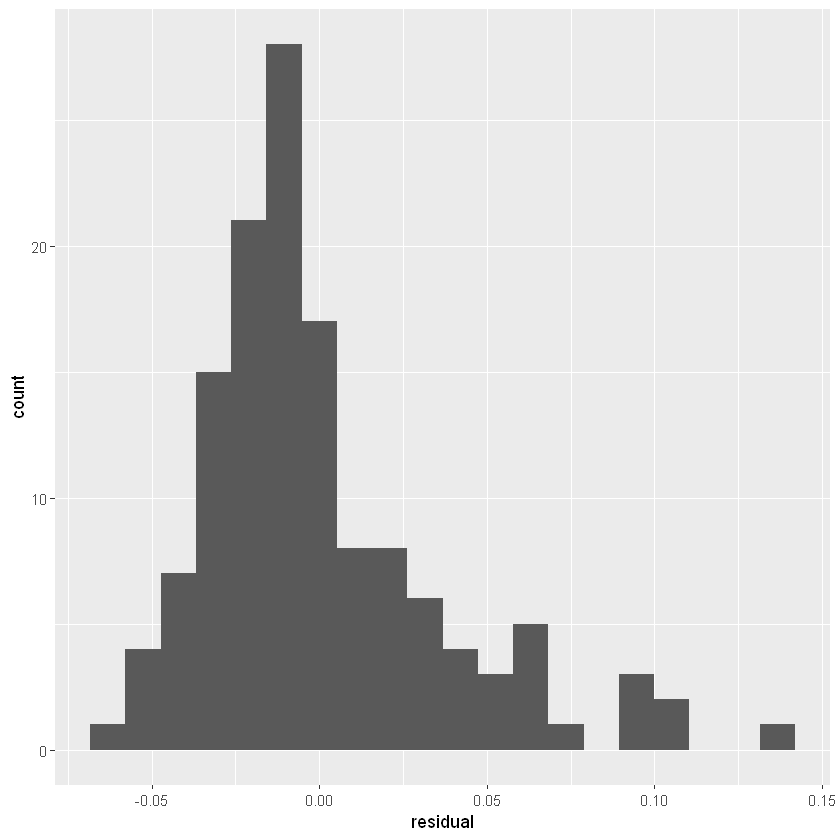

In [72]:
tibble(residual = fit_6$residuals) %>%
    ggplot(aes(residual)) +
    geom_histogram(bins = 20)

> The distribution is slightly right skewed. So the residuals does not follow the normal distribution. It seems that my model failed to capture some features.

## 8. Summary and conclusions
